In [2]:
import os
import shutil
import glob
import datetime
import time
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [5]:
# Read the Files 

data = pd.read_csv("all_subjects_processed.csv", index_col=0)

In [6]:
data

,ledGreen,accelerometer,gyroscope,sleep_state
0,4723.0,4197.309972,224.706475,0
1,4724.0,4192.738127,244.544474,0
2,4726.0,4194.695460,237.373124,0
3,4728.0,4189.388619,238.648277,0
4,4731.0,4200.907878,261.860650,0
...,...,...,...,...
8966628,5079.0,4059.924384,317.157689,1
8966629,5081.0,4062.915825,338.622208,1
8966630,5081.0,4062.181187,350.178526,1
8966631,5085.0,4064.774779,350.767729,1


## Classification

In [7]:
from pycaret.classification import *

In [12]:
exp_clf101 = setup(data = data, target = 'sleep_state', session_id=123) 

,Description,Value
0,Session id,123
1,Target,sleep_state
2,Target type,Binary
3,Original data shape,"(535201, 4)"
4,Transformed data shape,"(535201, 4)"
5,Transformed train set shape,"(374640, 4)"
6,Transformed test set shape,"(160561, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9396,0.9723,0.9741,0.9560,0.9650,0.7471,0.7488,6.1490
et,Extra Trees Classifier,0.9396,0.9722,0.9749,0.9553,0.9650,0.7459,0.7479,2.8370
lightgbm,Light Gradient Boosting Machine,0.9392,0.9740,0.9818,0.9487,0.9650,0.7344,0.7407,0.3500
knn,K Neighbors Classifier,0.9366,0.9431,0.9706,0.9558,0.9632,0.7366,0.7378,0.5630
gbc,Gradient Boosting Classifier,0.9236,0.9541,0.9792,0.9345,0.9563,0.6546,0.6661,4.9110
dt,Decision Tree Classifier,0.9211,0.8442,0.9530,0.9545,0.9537,0.6857,0.6858,0.2720
ada,Ada Boost Classifier,0.8934,0.9093,0.9691,0.9116,0.9395,0.4970,0.5139,1.3270
ridge,Ridge Classifier,0.8535,0.0000,0.9981,0.8546,0.9208,0.0145,0.0547,0.0530
lda,Linear Discriminant Analysis,0.8535,0.7573,0.9838,0.8635,0.9198,0.1174,0.1682,0.0660
dummy,Dummy Classifier,0.8535,0.5000,1.0000,0.8535,0.9210,0.0000,0.0000,0.0510


In [14]:
tuned_dt = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:41:35
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

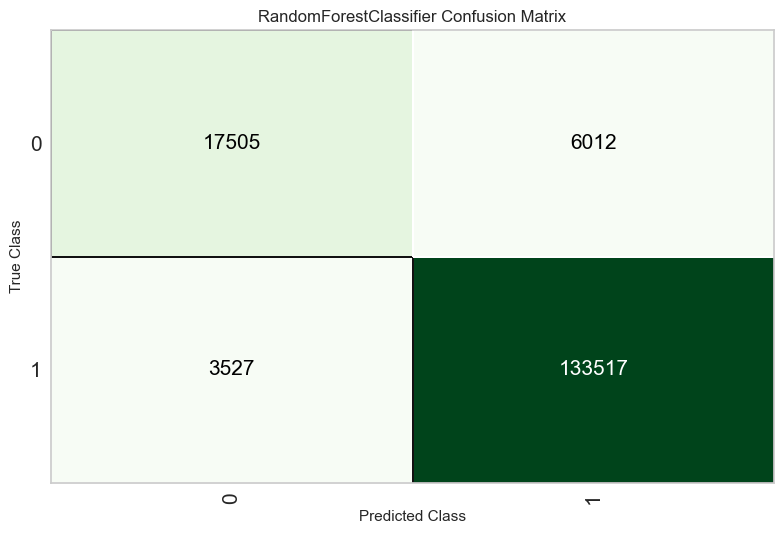

In [15]:
plot_model(best_model, plot = 'confusion_matrix')

In [30]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

## Preprocessing

In [18]:
# Read raw PPG files
mdf = pd.concat(map(pd.read_csv, glob.glob('../prof_data/resteaze/*.csv')))

In [23]:
mdf.reset_index(drop=True)
mdf

,Unnamed: 0,counter,unixTimes,accelerometerX,accelerometerY,accelerometerZ,capacitorsA,capacitorsB,capacitorsC,gyroscopeX,...,sleep_state,Leg Movement,Hypopnea,Arousal,RERA,Relative Desaturation,Obstructive Apnea,Central Apnea,Leg Movement (L),Leg Movement (R)
0,3430,3428,1643957818001,1321.0,-2998.0,-2570.0,30856.0,NaN,NaN,-113.0,...,-1.0,0,0,0,0,0,0,0,0,0
1,3431,3433,1643957818034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0,0,0,0,0,0,0,0,0
2,3432,3429,1643957818041,1320.0,-2993.0,-2562.0,30858.0,NaN,NaN,-54.0,...,-1.0,0,0,0,0,0,0,0,0,0
3,3433,3434,1643957818074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0,0,0,0,0,0,0,0,0
4,3434,3430,1643957818081,1355.0,-2979.0,-2559.0,30857.0,NaN,NaN,-46.0,...,-1.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117820,1117820,1117917,1646917292912,4034.0,377.0,-226.0,33071.0,NaN,NaN,103.0,...,NaN,0,0,0,0,0,0,0,0,0
1117821,1117821,1117922,1646917292938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
1117822,1117822,1117918,1646917292952,4033.0,381.0,-226.0,33072.0,NaN,NaN,104.0,...,NaN,0,0,0,0,0,0,0,0,0
1117823,1117823,1117923,1646917292978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0


In [24]:
mdf = mdf.apply(lambda x: pd.Series(x.dropna().values))

all_df = mdf[mdf.sleep_state != -1].reset_index()

all_df = all_df[[
    'unixTimes', 'accelerometerX', 'accelerometerY', 'accelerometerZ',
    'gyroscopeX', 'gyroscopeY', 'gyroscopeZ', 'ledGreen',
    'sleep_stage', 'sleep_state'
]].dropna()

# Binary Classification
all_df["sleep_state"] = np.where(all_df["sleep_state"] == 0, 0, 1)


In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from numpy import mean, sqrt, square, arange

# RMS of accelerometer
all_df['accelerometer'] = all_df[[
    'accelerometerX', 'accelerometerY', 'accelerometerZ'
]].apply(lambda x: sqrt(square(x['accelerometerX']) + square(x['accelerometerY']) + square(x['accelerometerZ'])), axis=1)

# RMS of gyroscope
all_df['gyroscope'] = all_df[[
    'gyroscopeX', 'gyroscopeY', 'gyroscopeZ'
]].apply(lambda x: sqrt(square(x['gyroscopeX']) + square(x['gyroscopeY']) + square(x['gyroscopeZ'])), axis=1)

all_df = all_df.drop(columns=['accelerometerX', 'accelerometerY', 'accelerometerZ', 'gyroscopeX', 'gyroscopeY', 'gyroscopeZ'])

In [26]:
data = all_df[['ledGreen','accelerometer','gyroscope','sleep_state']]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8966633 entries, 0 to 8966632
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ledGreen       float64
 1   accelerometer  float64
 2   gyroscope      float64
 3   sleep_state    int32  
dtypes: float64(3), int32(1)
memory usage: 307.8 MB


In [29]:
data.to_csv("all_subjects_processed.csv")